## Import Python libraries

In [22]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read data

In [24]:
#set path to the data file.
dataframe=pd.read_csv('/content/drive/My Drive/AI_MedProject/DiseasePrediction/dataset/malaria_clin_data.csv')

#read the data with pandas
dataframe

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,KC366,yes,Kintampo,2017,yes,No,37.1,Bacteria/Protozoa,Malaria/LRTI,Positive,...,277.0,12.3,7.1,71.3,22.6,6.1,8.9,2.7,0.7,16.1
2203,KC368,yes,Kintampo,2017,no,No,36.7,Bacteria/Protozoa,Helminthiasis,Negative,...,340.0,15.2,7.2,73.6,21.0,5.4,6.0,1.7,0.4,15.1
2204,KC369,yes,Kintampo,2017,yes,No,36.4,Bacteria,Dermatitis,Negative,...,300.0,14.3,6.5,43.6,49.4,7.0,4.3,4.6,0.6,18.2
2205,KC370,yes,Kintampo,2017,yes,No,37.4,Not Known / Missing entry,URTI,Negative,...,136.0,13.3,7.1,35.3,58.1,6.6,4.4,7.1,0.8,14.2



## Data Exploration & Cleaning




In [25]:
#find the number of rows and columns in the dataframe
dataframe.shape

(2207, 34)

In [26]:
#get the first n rows in the dataframe
dataframe.head(n=5)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [27]:
# list the column names
dataframe.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [28]:
#we are interested in the columns : 'Clinical_diagnosis' up to 'RBC_dist_width_Percent'
#meaning we will subset the data from column 16 - the last column
subset=dataframe.iloc[:,16:]

In [29]:
# handling missing values
# drop / remove all rows with missing values
subset.dropna(inplace=True)

In [30]:
#Let us get the different malaria outcomes.
#The outcomes will be our labels/classes in the data

subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)


## **Data preprocesing**
This is done to put the data in an appropriate format before modelling


In [31]:
# separate the labels/classes from the features/measurement
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [32]:
#let's encode target labels (y). We will use onehot encoding.

label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
y=label_binarize(y,classes=np.unique(y))
nclasses=y.shape[1]

\
**Data Splitting**\
Data is split into three: training, validation and test sets\
-training set is used for training.\
-validation set is used for evaluating the model during training.\
-test set is used to test the model after training and tuning has been completed.

In [33]:
#split data into training,validation and test sets

#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

\
**Data Normalization**\
Data normalization is done so that the values are in the same range. This will improve model performance and avoid bias. \
Normalization is performed separately on each data set. This is done to prevent data leakage.

In [34]:
### scale the data between 0-1

In [35]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

## Build the Neural Network Model

In [36]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.CategoricalAccuracy()])


In [37]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)


Epoch 1/200
44/44 [==============================] - 1s 7ms/step - loss: 1.0221 - categorical_accuracy: 0.5214 - val_loss: 0.9741 - val_categorical_accuracy: 0.6087
Epoch 2/200
44/44 [==============================] - 0s 3ms/step - loss: 0.9184 - categorical_accuracy: 0.5606 - val_loss: 0.8658 - val_categorical_accuracy: 0.7246
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.8097 - categorical_accuracy: 0.6896 - val_loss: 0.7749 - val_categorical_accuracy: 0.6928
Epoch 4/200
44/44 [==============================] - 0s 5ms/step - loss: 0.7015 - categorical_accuracy: 0.7556 - val_loss: 0.7238 - val_categorical_accuracy: 0.7130
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6268 - categorical_accuracy: 0.7556 - val_loss: 0.6027 - val_categorical_accuracy: 0.7681
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 0.5852 - categorical_accuracy: 0.7621 - val_loss: 0.5846 - val_categorical_accuracy: 0.7855
Epoch 7/20

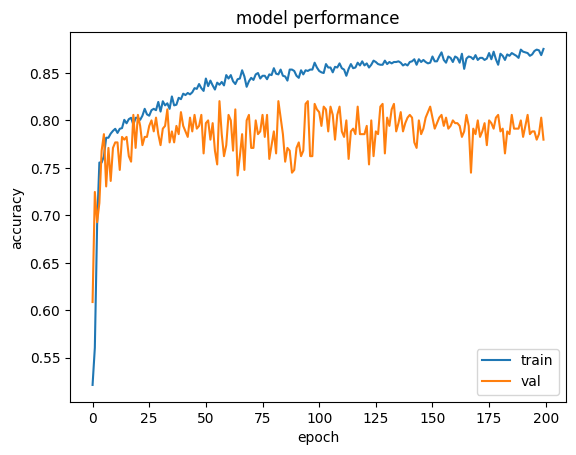

In [38]:
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

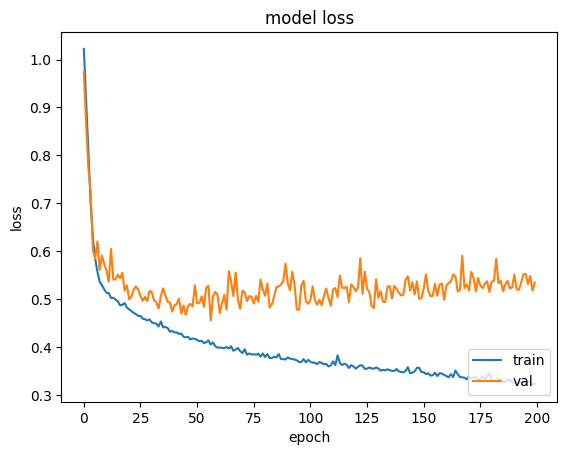

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

## Predict on data
Let's use our trained model to classify some samples which were not included in the training or validation sets. This data is the test set.

In [40]:
model.save('/content/drive/My Drive/Colab Notebooks/AI_MedProject/DiseasePrediction/malaria_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
